# Pergunta 2 - É possível um país dissociar o crescimento econômico do aumento de emissões?



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data/Gas Emissions/total-ghg-emissions.csv`

In [71]:
# Resposta:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_emissions = pd.read_csv('../data/Gas Emissions/total-ghg-emissions.csv', sep=',')
df_emissions.head(n=15)

,Entity,Code,Year,Total including LUCF
0,Afghanistan,AFG,1990,9.580000e+06
1,Afghanistan,AFG,1991,9.810000e+06
2,Afghanistan,AFG,1992,9.030000e+06
3,Afghanistan,AFG,1993,9.110000e+06
4,Afghanistan,AFG,1994,9.150000e+06
5,Afghanistan,AFG,1995,9.580000e+06
6,Afghanistan,AFG,1996,1.061000e+07
7,Afghanistan,AFG,1997,1.158000e+07
8,Afghanistan,AFG,1998,1.240000e+07
9,Afghanistan,AFG,1999,1.328000e+07


Inicializa outro Dataframe de PIB (GDP)

In [72]:
df_gdp = pd.read_csv('../data/GDP/GDP_Countries.csv', sep = ',')

df_gdp = df_gdp.drop(['Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 'Unnamed: 66'], axis=1)

df_gdp = df_gdp.melt(id_vars=['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

df_gdp["Year"] = pd.to_numeric(df_gdp_new["Year"])

df_gdp.head(n=15)



,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1991,8.720670e+08
1,Africa Eastern and Southern,AFE,1991,2.734028e+11
2,Afghanistan,AFG,1991,NaN
3,Africa Western and Central,AFW,1991,1.174571e+11
4,Angola,AGO,1991,1.060378e+10
5,Albania,ALB,1991,1.099559e+09
6,Andorra,AND,1991,1.106929e+09
7,Arab World,ARB,1991,4.715260e+11
8,United Arab Emirates,ARE,1991,5.155217e+10
9,Argentina,ARG,1991,1.897200e+11


Inicializo o dataframe de GDP per Capita e o de IDH

In [73]:
df_gdp_capita = pd.read_csv('../data/gdp-per-capita.csv', sep = ';')

df_gdp_capita = df_gdp_capita.drop(['Indicator Name', 'Column1', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990'], axis=1)

df_gdp_capita = df_gdp_capita.melt(id_vars=['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP_Per_Capita')

df_gdp_capita["Year"] = pd.to_numeric(df_gdp_capita_clean["Year"])

df_gdp_capita.head(n=15)

,Country Name,Country Code,Year,GDP_Per_Capita
0,Aruba,ABW,1991,"1,34947E+14"
1,Africa Eastern and Southern,AFE,1991,"8,72391E+14"
2,Afghanistan,AFG,1991,NaN
3,Africa Western and Central,AFW,1991,"5,58436E+14"
4,Angola,AGO,1991,"8,65693E+13"
5,Albania,ALB,1991,"3,36587E+14"
6,Andorra,AND,1991,"1,95343E+14"
7,Arab World,ARB,1991,"2,06148E+14"
8,United Arab Emirates,ARE,1991,"2,66123E+13"
9,Argentina,ARG,1991,"5,73536E+13"


In [74]:
df_hdi = pd.read_csv('../data/human-development-index.csv', sep = ';')

df_hdi = df_hdi.drop(df_hdi[df_hdi.Year < 1991].index)

df_hdi
#df_gdp_capita_clean = df_gdp_capita.melt(id_vars=['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP_Per_Capita')

#df_gdp_capita_clean["Year"] = pd.to_numeric(df_gdp_capita_clean["Year"])

#df_gdp_capita_clean.head(n=15)

,Entity,Code,Year,Human Development Index (UNDP)
2,Afghanistan,AFG,2002,0.373
3,Afghanistan,AFG,2003,0.383
4,Afghanistan,AFG,2004,0.398
5,Afghanistan,AFG,2005,0.408
6,Afghanistan,AFG,2006,0.417
...,...,...,...,...
4996,Zimbabwe,ZWE,2013,0.516
4997,Zimbabwe,ZWE,2014,0.525
4998,Zimbabwe,ZWE,2015,0.529
4999,Zimbabwe,ZWE,2016,0.532


Inicializo o dataframe de países, para verificar o continente de cada país

In [75]:
df_countries = pd.read_csv('../data/countries/country-continent.csv', sep = ',')
df_countries.rename(columns = {'name': 'Country Name'}, inplace = True)
df_countries.drop(df_countries.columns.difference(['Country Name','region', 'sub-region']), 1, inplace=True)
df_countries
#df_gdp.merge(df_countries, )

C:\Users\Pedro\AppData\Local\Temp\ipykernel_4368\3123994201.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_countries.drop(df_countries.columns.difference(['Country Name','region', 'sub-region']), 1, inplace=True)


,Country Name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


Realizo um merge com os países e GDP, para verificar quais são os continentes e suas subregiões e agrupo pelas regiões (Continentes)

In [76]:
df_all = pd.merge(df_gdp, df_gdp_capita, left_on = ['Country Name', 'Year', 'Country Code'], right_on = ['Country Name', 'Year', 'Country Code'])
df_all

,Country Name,Country Code,Year,GDP,GDP_Per_Capita
0,Aruba,ABW,1991,8.720670e+08,"1,34947E+14"
1,Africa Eastern and Southern,AFE,1991,2.734028e+11,"8,72391E+14"
2,Afghanistan,AFG,1991,NaN,NaN
3,Africa Western and Central,AFW,1991,1.174571e+11,"5,58436E+14"
4,Angola,AGO,1991,1.060378e+10,"8,65693E+13"
...,...,...,...,...,...
8210,Kosovo,XKX,2021,9.007159e+09,"4,98658E+14"
8211,"Yemen, Rep.",YEM,2021,2.106169e+10,"6,90759E+14"
8212,South Africa,ZAF,2021,4.199464e+11,"6,99421E+14"
8213,Zambia,ZMB,2021,2.120306e+10,"1,12063E+14"


Realizo as importações para a Regressão

In [77]:
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels as lm

Junto com o dataset de emissões

In [78]:
df_emissions.rename(columns = {'Total including LUCF': 'Total_Emissions', 'Entity':'Country Name', 'Code':'Country Code'}, inplace = True)
df_all = pd.merge(df_all, df_emissions, left_on = ['Country Name', 'Year', 'Country Code'], right_on = ['Country Name', 'Year', 'Country Code'])
df_all

,Country Name,Country Code,Year,GDP,GDP_Per_Capita,Total_Emissions
0,Afghanistan,AFG,1991,NaN,NaN,9.810000e+06
1,Angola,AGO,1991,1.060378e+10,"8,65693E+13",6.659000e+07
2,Albania,ALB,1991,1.099559e+09,"3,36587E+14",8.960000e+06
3,Andorra,AND,1991,1.106929e+09,"1,95343E+14",4.300000e+05
4,United Arab Emirates,ARE,1991,5.155217e+10,"2,66123E+13",8.107000e+07
...,...,...,...,...,...,...
4838,Vanuatu,VUT,2019,9.365263e+08,"3,12298E+14",8.700000e+05
4839,Samoa,WSM,2019,8.520071e+08,"4,32287E+14",7.900000e+05
4840,South Africa,ZAF,2019,3.879346e+11,"6,62476E+14",5.621900e+08
4841,Zambia,ZMB,2019,2.330867e+10,"1,305E+14",9.136000e+07


Seleciono apenas os continentes para fazer a comparação

In [79]:
from operator import concat
model = smf.ols("Total_Emissions ~ GDP + GDP_Per_Capita", data=df_all)
response = model.fit()
response.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total_Emissions   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                nan
Time:                        23:17:52   Log-Likelihood:                -85642.
No. Observations:                4684   AIC:                         1.713e+05
Df Residuals:                    4683   BIC:                         1.713e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      6.393e+07   3.16e+05    202.036      0.000    6.33e+07    6.45e+07
GDP_Per_Capita[T.1,00094E+14] -2.611e+07   2.12e+07     -1.233      0.218   -6.76e+07    1.54e+07
GDP_Per_Capita[T.1,00166E+14] -5.015e+07   2.11e+07     -2.376      0.018   -9.15e+07   -8.78e+06
GDP_Per_Capita[T.1,00172E+14] -5.882e+07   2.11e+07     -2.787      0.005      -1e+08   -1.74e+07
GDP_Per_Capita[T.1,00272E+14] -5.675e+07   2.11e+07     -2.694      0.007    -9.8e+07   -1.55e+07
GDP_Per_Capita[T.1,00289E+14] -8.846e+07   1.49e+07     -5.925      0.000   -1.18e+08   -5.92e+07
GDP_Per_Capita[T.1,00339E+14]  5.919e+07   2.11e+07      2.805      0.005    1.78e+07    1.01e+08
GDP_Per_Capita[T.1,00437E+14]  -3.49e+08   2.11e+07    -16.529      0.000    -3.9e+08   -3.08e+08
GDP_Per_Capita[T.1,00491E+14]  6.054e+07   2.11e+07      2.867      0.004    1.91e+07    1.02e+08
GDP_Per_Capita[T.1,00515E+14] -2.064e+07   2.11e+07     -0.978      0.328    -6.2e+07    2.07e+07
GDP_Per_Capita[T.1,00573E+14] -3.363e+07   2.11e+07     -1.594      0.111    -7.5e+07    7.73e+06
GDP_Per_Capita[T.1,00601E+14] -2.867e+08   2.11e+07    -13.588      0.000   -3.28e+08   -2.45e+08
GDP_Per_Capita[T.1,00627E+14] -6.582e+07   2.11e+07     -3.119      0.002   -1.07e+08   -2.44e+07
GDP_Per_Capita[T.1,00747E+14]  1.142e+07   2.11e+07      0.541      0.589      -3e+07    5.28e+07
GDP_Per_Capita[T.1,0075E+12]  -3.491e+07   2.11e+07     -1.654      0.098   -7.63e+07    6.47e+06
GDP_Per_Capita[T.1,0075E+14]  -7.327e+07   2.11e+07     -3.472      0.001   -1.15e+08   -3.19e+07
GDP_Per_Capita[T.1,00763E+14] -4.293e+07   2.11e+07     -2.037      0.042   -8.43e+07   -1.61e+06
GDP_Per_Capita[T.1,00764E+14]  1.085e+08   2.11e+07      5.140      0.000    6.71e+07     1.5e+08
GDP_Per_Capita[T.1,00787E+14]  1.622e+08   2.11e+07      7.687      0.000    1.21e+08    2.04e+08
GDP_Per_Capita[T.1,00804E+14] -7.134e+07   2.11e+07     -3.384      0.001   -1.13e+08      -3e+07
GDP_Per_Capita[T.1,00998E+14] -6.264e+07   2.11e+07     -2.970      0.003   -1.04e+08   -2.13e+07
GDP_Per_Capita[T.1,01001E+13] -5.763e+07   2.11e+07     -2.731      0.006    -9.9e+07   -1.63e+07
GDP_Per_Capita[T.1,0101E+14]  -6.321e+07   2.11e+07     -2.996      0.003   -1.05e+08   -2.18e+07
GDP_Per_Capita[T.1,01139E+14]  1.601e+08   2.11e+07      7.581      0.000    1.19e+08    2.02e+08
GDP_Per_Capita[T.1,01175E+14]  -3.63e+07   2.11e+07     -1.724      0.085   -7.76e+07    4.97e+06
GDP_Per_Capita[T.1,01198E+14]  3.902e+08   2.11e+07     18.494      0.000    3.49e+08    4.32e+08
GDP_Per_Capita[T.1,01261E+14] -2.922e+07   2.11e+07     -1.384      0.167   -7.06e+07    1.22e+07
GDP_Per_Capita[T.1,01304E+14] -5.627e+07   2.11e+07     -2.663      0.008   -9.77e+07   -1.48e+07
GDP_Per_Capita[T.1,01342E+14]  4.156e+07   2.

In [80]:
df_pivot = df_emissions.pivot(index='Year', columns='Entity', values='Total_Emissions')
df_pivot

KeyError: 'Entity'

## Visualização da distribuição das variáveis

Verificar os países que mais emitiam gases por década

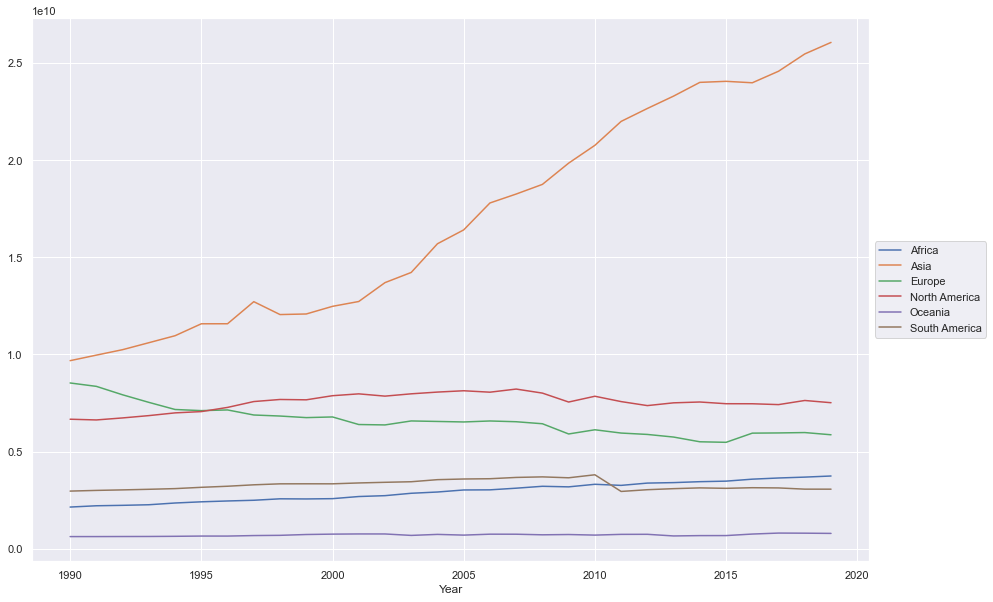

In [ ]:
# Resposta:
import matplotlib.pyplot as plt
#df_grouped = df_emissions.groupby(['Entity', 'Year']).mean()
#df_pivot = df_pivot.set_index('Year')
df_pivot.plot.line(figsize=(15,10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
# df_masc = df.loc[df['SEXO'] == 'M']
# df_masc['IDADE'].hist()

Verifico se existe alguma correlação entre os continentes

In [ ]:
df_corr = df_pivot.corr()
df_corr = df_corr.style.background_gradient(cmap='RdBu')
df_corr

Entity,Africa,Asia,Europe,North America,Oceania,South America
Entity,,,,,,
Africa,1.000000,0.984574,-0.889871,0.453788,0.665783,0.101369
Asia,0.984574,1.000000,-0.857607,0.320049,0.583283,-0.029153
Europe,-0.889871,-0.857607,1.000000,-0.588267,-0.631952,-0.200650
North America,0.453788,0.320049,-0.588267,1.000000,0.631336,0.760151
Oceania,0.665783,0.583283,-0.631952,0.631336,1.000000,0.271560
South America,0.101369,-0.029153,-0.200650,0.760151,0.271560,1.000000


Aqui vemos que a Europe tem oposta relação entre Africa e Asia

Junto os dois datasets

In [ ]:
# Resposta:

df_juncao = pd.merge(df_emissions, df_gdp_new, how='left', left_on=['Entity', 'Year'], right_on=['Country Name', 'Year'])
df_juncao = df_juncao.dropna()
df_juncao

,Entity,Year,Total_Emissions,Country Name,Country Code,GDP
91,North America,1991,6.629540e+09,North America,NAC,6.770092e+12
92,North America,1992,6.733250e+09,North America,NAC,7.114395e+12
93,North America,1993,6.852090e+09,North America,NAC,7.437550e+12
94,North America,1994,6.993080e+09,North America,NAC,7.867242e+12
95,North America,1995,7.058730e+09,North America,NAC,8.245811e+12
96,North America,1996,7.274480e+09,North America,NAC,8.704364e+12
97,North America,1997,7.575230e+09,North America,NAC,9.235474e+12
98,North America,1998,7.682240e+09,North America,NAC,9.699949e+12
99,North America,1999,7.664820e+09,North America,NAC,1.031291e+13
100,North America,2000,7.876230e+09,North America,NAC,1.099920e+13
